# Data Preparation (DP) homework, part II: Pipelines

Welcome to the second part of Data Preparation homework!

In this notebook we're going to continue to work with the data about Bank Telemarketing.

# All imports necessary

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import auc

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
%matplotlib inline

sns.set(font_scale=2)

# Read the data and add some gaps

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# data_path = your_path

data_path = YOUR_DATA_PATH

Mounted at /content/drive


In [ ]:
data = pd.read_csv(os.path.join(data_path, 'bank-additional-full.csv'), sep=';')

In [ ]:
data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
columns_with_gaps = data.columns[:-1]

In [ ]:
minimum = 0
maximum = 0.3

In [ ]:
columns_with_gaps_dict = dict(
    zip(
        columns_with_gaps,
        np.random.uniform(
            minimum,
            maximum,
            len(columns_with_gaps)
        )
    )
)

In [ ]:
columns_with_gaps_dict

{'age': 0.15526440071242195,
 'job': 0.16778772064651412,
 'marital': 0.11905309241896873,
 'education': 0.26483612956822056,
 'default': 0.2396189650766815,
 'housing': 0.03039508857758858,
 'loan': 0.18698986835745302,
 'contact': 0.1273767565037868,
 'month': 0.17168128586773493,
 'day_of_week': 0.13555844691880228,
 'duration': 0.08887878252246162,
 'campaign': 0.29607054937937505,
 'pdays': 0.24372656695006725,
 'previous': 0.1406232544905859,
 'poutcome': 0.22954024317283586,
 'emp.var.rate': 0.16775142028329845,
 'cons.price.idx': 0.23395928238905628,
 'cons.conf.idx': 0.1807186083630856,
 'euribor3m': 0.02658488435589654,
 'nr.employed': 0.13494271900820234}

In [ ]:
data_with_gaps = data.copy()

In [ ]:
for column in columns_with_gaps:
    if columns_with_gaps_dict[column] > 0:
        gaps_count = int(
            len(data_with_gaps) * columns_with_gaps_dict[column]
        )
        data_with_gaps[column].iloc[
            np.random.randint(
                0,
                len(data_with_gaps),
                gaps_count
            )
        ] = np.nan

In [ ]:
data_with_gaps.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35318 non-null  float64
 1   job             34805 non-null  object 
 2   marital         36539 non-null  object 
 3   education       31611 non-null  object 
 4   default         32384 non-null  object 
 5   housing         39951 non-null  object 
 6   loan            34167 non-null  object 
 7   contact         36249 non-null  object 
 8   month           34689 non-null  object 
 9   day_of_week     35971 non-null  object 
 10  duration        37694 non-null  float64
 11  campaign        30634 non-null  float64
 12  pdays           32307 non-null  float64
 13  previous        35768 non-null  float64
 14  poutcome        32773 non-null  object 
 15  emp.var.rate    34867 non-null  float64
 16  cons.price.idx  32620 non-null  float64
 17  cons.conf.idx   34382 non-null 

In [ ]:
numerical_features = [
    'age',
    'campaign',
    'cons.conf.idx',
    'cons.price.idx',
    'duration',
    'emp.var.rate',
    'euribor3m',
    'nr.employed',
    'pdays',
    'previous'
]

In [ ]:
categorical_features = [
    'contact',
    'day_of_week',
    'default',
    'education',
    'housing',
    'job',
    'loan',
    'marital',
    'month',
    'poutcome'
]

In [ ]:
target = 'y'

# Split the data into train and test

In [ ]:
X, y = data_with_gaps[numerical_features + categorical_features], data_with_gaps[target]

In [ ]:
#y = CustomLabelBinarizer().fit_transform(X, CustomLabelEncoder().fit_transform(X, y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
X_train.shape

(28831, 20)

In [ ]:
X_test.shape

(12357, 20)

In [ ]:
y_train.shape

(28831,)

In [ ]:
y_test.shape

(12357,)

# Pipeline

## Separated pipelines

### Numerical features

In [ ]:
num_features_pipeline = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scale', MinMaxScaler()),
    ('transform', QuantileTransformer(output_distribution='normal'))
])

In [ ]:
num_features_transformed = num_features_pipeline.fit_transform(X_train[numerical_features], y_train)

In [ ]:
num_features_pipeline.named_steps

{'impute': SimpleImputer(),
 'scale': MinMaxScaler(),
 'transform': QuantileTransformer(output_distribution='normal')}

In [ ]:
for key in num_features_pipeline.get_params().keys():
    print(key)

memory
steps
verbose
impute
scale
transform
impute__add_indicator
impute__copy
impute__fill_value
impute__keep_empty_features
impute__missing_values
impute__strategy
impute__verbose
scale__clip
scale__copy
scale__feature_range
transform__copy
transform__ignore_implicit_zeros
transform__n_quantiles
transform__output_distribution
transform__random_state
transform__subsample


In [ ]:
type(num_features_transformed)

numpy.ndarray

In [ ]:
num_features_transformed.shape

(28831, 10)

### Categorical features

In [ ]:
cat_features_pipeline = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [ ]:
cat_features_transformed = cat_features_pipeline.fit_transform(X_train[categorical_features], y_train)

In [ ]:
cat_features_pipeline.named_steps

{'impute': SimpleImputer(fill_value='missing', strategy='constant'),
 'onehot': OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)}

In [ ]:
for key in cat_features_pipeline.get_params().keys():
    print(key)

memory
steps
verbose
impute
onehot
impute__add_indicator
impute__copy
impute__fill_value
impute__keep_empty_features
impute__missing_values
impute__strategy
impute__verbose
onehot__categories
onehot__drop
onehot__dtype
onehot__handle_unknown
onehot__max_categories
onehot__min_frequency
onehot__sparse
onehot__sparse_output


In [ ]:
for name in cat_features_pipeline.get_params()['onehot'].get_feature_names_out():
    print(name)

x0_cellular
x0_missing
x0_telephone
x1_fri
x1_missing
x1_mon
x1_thu
x1_tue
x1_wed
x2_missing
x2_no
x2_unknown
x2_yes
x3_basic.4y
x3_basic.6y
x3_basic.9y
x3_high.school
x3_illiterate
x3_missing
x3_professional.course
x3_university.degree
x3_unknown
x4_missing
x4_no
x4_unknown
x4_yes
x5_admin.
x5_blue-collar
x5_entrepreneur
x5_housemaid
x5_management
x5_missing
x5_retired
x5_self-employed
x5_services
x5_student
x5_technician
x5_unemployed
x5_unknown
x6_missing
x6_no
x6_unknown
x6_yes
x7_divorced
x7_married
x7_missing
x7_single
x7_unknown
x8_apr
x8_aug
x8_dec
x8_jul
x8_jun
x8_mar
x8_may
x8_missing
x8_nov
x8_oct
x8_sep
x9_failure
x9_missing
x9_nonexistent
x9_success


In [ ]:
type(cat_features_transformed)

numpy.ndarray

In [ ]:
cat_features_transformed.shape

(28831, 63)

## Unified pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_features_pipeline, numerical_features),
        ('cat', cat_features_pipeline, categorical_features)
    ]
)

In [ ]:
unified_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor)
    ]
)

In [ ]:
all_features_transformed = unified_pipeline.fit_transform(X_train, y_train)

In [ ]:
unified_pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('impute', SimpleImputer()),
                                                  ('scale', MinMaxScaler()),
                                                  ('transform',
                                                   QuantileTransformer(output_distribution='normal'))]),
                                  ['age', 'campaign', 'cons.conf.idx',
                                   'cons.price.idx', 'duration', 'emp.var.rate',
                                   'euribor3m', 'nr.employed', 'pdays',
                                   'previous']),
                                 ('cat',
                                  Pipeline(steps=[('impute',
                                                   SimpleImputer(fill_value='missing',
                                                                 strategy='constant')),
                                                  ('onehot',
      

In [ ]:
for key in unified_pipeline.get_params().keys():
    print(key)

memory
steps
verbose
preprocessing
preprocessing__n_jobs
preprocessing__remainder
preprocessing__sparse_threshold
preprocessing__transformer_weights
preprocessing__transformers
preprocessing__verbose
preprocessing__verbose_feature_names_out
preprocessing__num
preprocessing__cat
preprocessing__num__memory
preprocessing__num__steps
preprocessing__num__verbose
preprocessing__num__impute
preprocessing__num__scale
preprocessing__num__transform
preprocessing__num__impute__add_indicator
preprocessing__num__impute__copy
preprocessing__num__impute__fill_value
preprocessing__num__impute__keep_empty_features
preprocessing__num__impute__missing_values
preprocessing__num__impute__strategy
preprocessing__num__impute__verbose
preprocessing__num__scale__clip
preprocessing__num__scale__copy
preprocessing__num__scale__feature_range
preprocessing__num__transform__copy
preprocessing__num__transform__ignore_implicit_zeros
preprocessing__num__transform__n_quantiles
preprocessing__num__transform__output_dist

In [ ]:
type(all_features_transformed)

numpy.ndarray

In [ ]:
all_features_transformed.shape

(28831, 73)

In [ ]:
preprocessed_data = unified_pipeline.fit_transform(X)
preprocessed_data.shape

(41188, 73)

In [ ]:
type(preprocessed_data)

numpy.ndarray

In [ ]:
preprocessed_target = LabelEncoder().fit_transform(y)
preprocessed_target.shape

(41188,)

In [ ]:
df = pd.DataFrame(data=preprocessed_data)
df['target'] = preprocessed_target
df.head().T

,0,1,2,3,4
0,1.509656,1.629992,-0.262686,-0.043924,1.509656
1,-5.199338,0.346817,0.346817,-5.199338,-5.199338
2,0.738089,0.209787,0.738089,0.209787,0.738089
3,0.908975,0.908975,0.908975,0.908975,0.908975
4,0.516356,-0.317650,0.148584,-0.300542,0.689529
...,...,...,...,...,...
69,0.000000,0.000000,0.000000,0.000000,0.000000
70,1.000000,0.000000,0.000000,0.000000,0.000000
71,0.000000,1.000000,1.000000,1.000000,1.000000
72,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df.shape

(41188, 74)

In [ ]:
data_path

'/content/drive/My Drive/DS/DS_basic_course/EDA/Homework/data'

In [ ]:
#save preprocessed_data
df.to_csv(os.path.join(data_path, "preprocessed_data.csv.gz"), compression='gzip', index=False)

## Pipeline + classifier

In [ ]:
classifier_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('classify', LogisticRegression())
    ]
)

In [ ]:
classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler()),
                                                                  ('transform',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['age', 'campaign',
                                                   'cons.conf.idx',
                                                   'cons.price.idx', 'duration',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['contact', 'day_of_week',
                                                   'default', 'education',
                                                   'housing', 'job', 'loan',
                                                   'marital', 'month',
                                                   'poutcome'])])),
                ('classify', LogisticRegression())])

In [ ]:
y_pred = classifier_pipeline.predict_proba(X_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1], pos_label='yes')

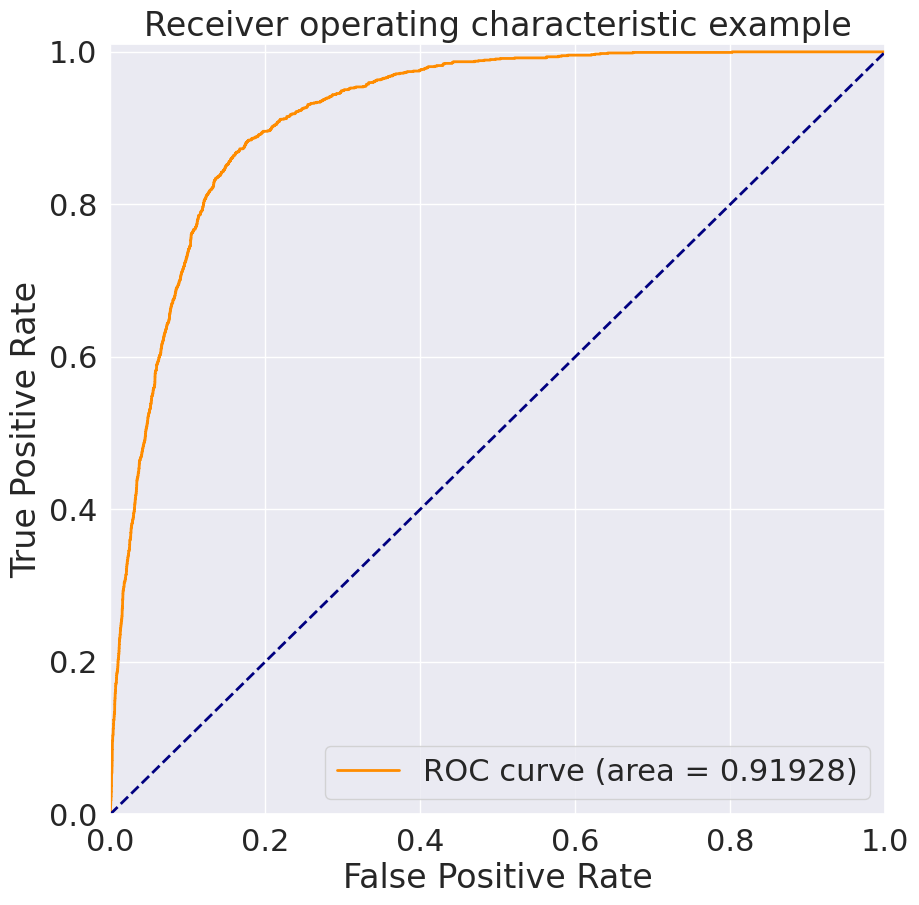

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.5f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(cross_val_score(classifier_pipeline, X_train, y_train, cv=5))

[0.90619039 0.90981616 0.90964273 0.90582726 0.90322581]


# GridSearch

In [ ]:
param_grid = [
    {
        'preprocessing__num__impute': [
            SimpleImputer(missing_values=np.nan, strategy='mean'),
            SimpleImputer(missing_values=np.nan, strategy='median'),
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ],
        'preprocessing__num__scale': [
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
            StandardScaler()
        ],
        'preprocessing__num__transform': [
            QuantileTransformer(output_distribution='normal'),
            PowerTransformer()
        ]
    }
]

In [ ]:
grid = GridSearchCV(classifier_pipeline, cv=5, param_grid=param_grid)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          MinMaxScaler()),
                                                                                         ('transform',
                                                                                          QuantileTransformer(output_distribution='normal'))]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'cons.conf.idx',
                                                                          'cons.price.idx',
                                                                          'duration',
                                                                          'emp.var.rate',
                                                                          'euribor3m',
                                                                          'nr.employed',
                                                                          'pdays',
                                                                          'prev...
                                       ('classify', LogisticRegression())]),
             param_grid=[{'preprocessing__num__impute': [SimpleImputer(),
                                                         SimpleImputer(strategy='median'),
                                                         SimpleImputer(strategy='most_frequent')],
                          'preprocessing__num__scale': [MinMaxScaler(),
                                                        MaxAbsScaler(),
                                                        RobustScaler(),
                                                        StandardScaler()],
                          'preprocessing__num__transform': [QuantileTransformer(output_distribution='normal'),
                                                            PowerTransformer()]}])

In [ ]:
grid.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler()),
                                                                  ('transform',
                                                                   PowerTransformer())]),
                                                  ['age', 'campaign',
                                                   'cons.conf.idx',
                                                   'cons.price.idx', 'duration',
                                                   'emp.var.rate', 'euribor3m',
                                                   'nr.employed', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['contact', 'day_of_week',
                                                   'default', 'education',
                                                   'housing', 'job', 'loan',
                                                   'marital', 'month',
                                                   'poutcome'])])),
                ('classify', LogisticRegression())])

In [ ]:
for key in grid.best_estimator_.get_params().keys():
    print(key)

memory
steps
verbose
preprocessing
classify
preprocessing__n_jobs
preprocessing__remainder
preprocessing__sparse_threshold
preprocessing__transformer_weights
preprocessing__transformers
preprocessing__verbose
preprocessing__verbose_feature_names_out
preprocessing__num
preprocessing__cat
preprocessing__num__memory
preprocessing__num__steps
preprocessing__num__verbose
preprocessing__num__impute
preprocessing__num__scale
preprocessing__num__transform
preprocessing__num__impute__add_indicator
preprocessing__num__impute__copy
preprocessing__num__impute__fill_value
preprocessing__num__impute__keep_empty_features
preprocessing__num__impute__missing_values
preprocessing__num__impute__strategy
preprocessing__num__impute__verbose
preprocessing__num__scale__copy
preprocessing__num__scale__quantile_range
preprocessing__num__scale__unit_variance
preprocessing__num__scale__with_centering
preprocessing__num__scale__with_scaling
preprocessing__num__transform__copy
preprocessing__num__transform__method

In [ ]:
y_pred = grid.best_estimator_.predict_proba(X_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1], pos_label = 'yes')

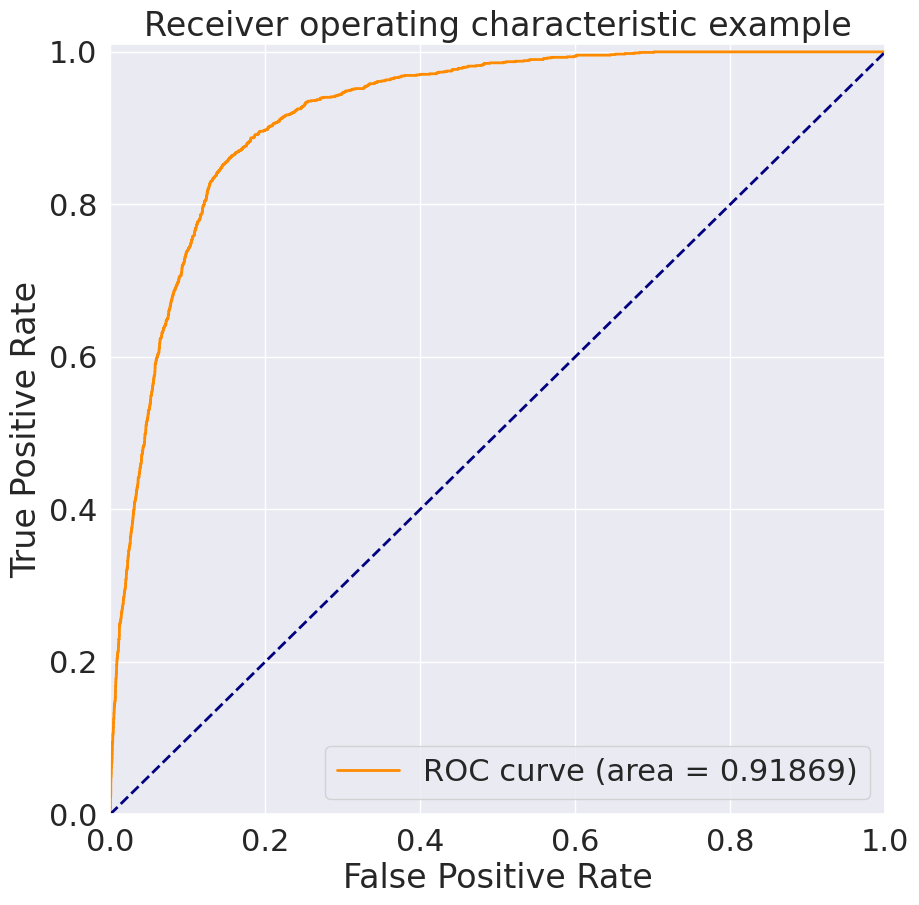

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.5f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
for key in grid.cv_results_.keys():
    print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_preprocessing__num__impute
param_preprocessing__num__scale
param_preprocessing__num__transform
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
grid.cv_results_["mean_test_score"]

array([0.90707922, 0.90631617, 0.90683641, 0.90659367, 0.90697515,
       0.90739133, 0.9068711 , 0.90673235, 0.90728725, 0.90558777,
       0.90711384, 0.90569181, 0.90728727, 0.90746072, 0.90714853,
       0.90673235, 0.90676699, 0.90513686, 0.90680167, 0.90513686,
       0.90676698, 0.90576119, 0.90669763, 0.90531026])

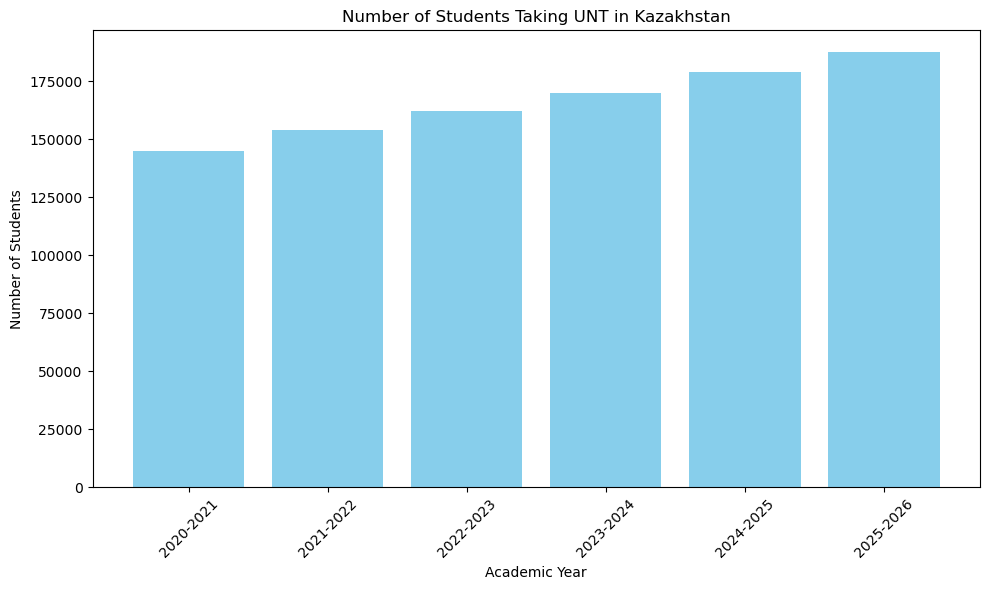

In [1]:
import matplotlib.pyplot as plt

# Data for the number of students taking the Unified National Testing (ENT) in Kazakhstan
years = ["2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025", "2025-2026"]
students = [145000, 154000, 162000, 170000, 179000, 187500]

# Creating a bar chart for the number of students
plt.figure(figsize=(10, 6))
plt.bar(years, students, color='skyblue')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.title('Number of Students Taking UNT in Kazakhstan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

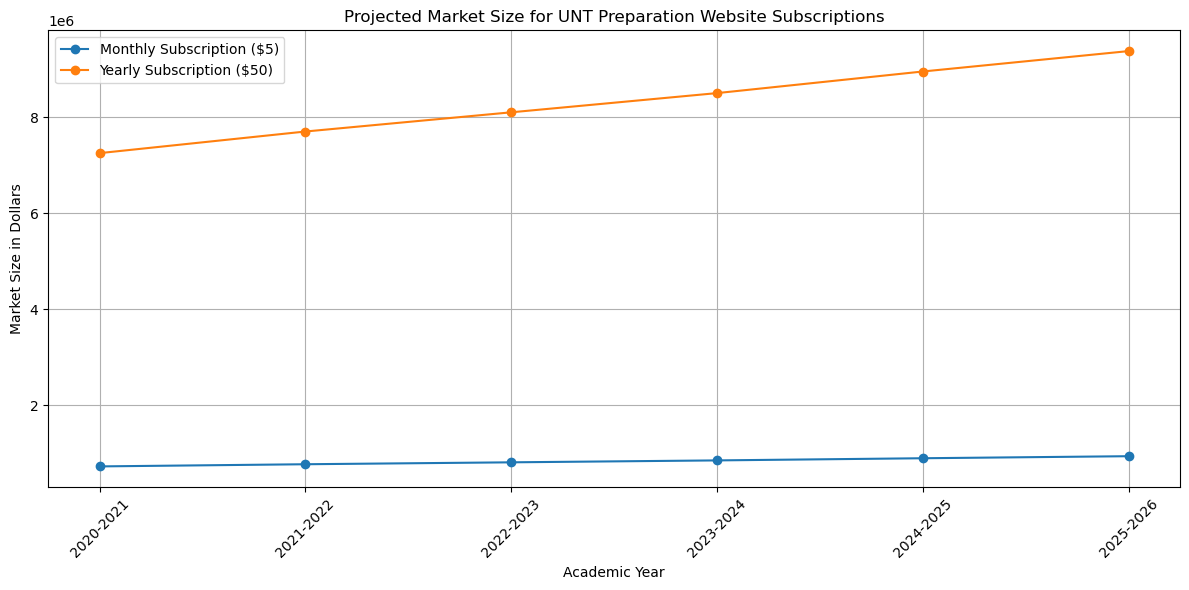

In [2]:
monthly_subscription_price = 5  # in dollars
yearly_subscription_price = 50  # in dollars

# Market size calculation
monthly_market_size = [s * monthly_subscription_price for s in students]
yearly_market_size = [s * yearly_subscription_price for s in students]

# Creating line plots for the market size over the years
plt.figure(figsize=(12, 6))

plt.plot(years, monthly_market_size, label='Monthly Subscription ($5)', marker='o')
plt.plot(years, yearly_market_size, label='Yearly Subscription ($50)', marker='o')

plt.xlabel('Academic Year')
plt.ylabel('Market Size in Dollars')
plt.title('Projected Market Size for UNT Preparation Website Subscriptions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()